In [9]:
from PIL import Image
from io import BytesIO

import os
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import imageio.v3 as iio

In [2]:
data_dir = '/media/mountHDD3/data_storage/biomedical_data/isic/2024'
trimg_dir = os.path.join(data_dir, 'train-image')
trhdf5 = os.path.join(data_dir, 'train-image.hdf5')
tshdf5 = os.path.join(data_dir, 'test-image.hdf5')
trmeta = os.path.join(data_dir, 'train-metadata.csv')
tsmeta = os.path.join(data_dir, 'test-metadata.csv')
subform = os.path.join(data_dir, 'sample_submission.csv')

# Metadata

In [3]:
trdf = pd.read_csv(trmeta)
print(trdf.shape)
print(trdf.columns)
trdf.head()

(401059, 55)
Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mito

/tmp/ipykernel_411086/2980682985.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  trdf = pd.read_csv(trmeta)


,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [4]:
tsdf = pd.read_csv(tsmeta)
print(tsdf.shape)
print(tsdf.columns)
tsdf.head()

(3, 44)
Index(['isic_id', 'patient_id', 'age_approx', 'sex', 'anatom_site_general',
       'clin_size_long_diam_mm', 'image_type', 'tbp_tile_type', 'tbp_lv_A',
       'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext',
       'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
       'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
       'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB',
       'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_location',
       'tbp_lv_location_simple', 'tbp_lv_minorAxisMM',
       'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color',
       'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL',
       'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle',
       'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'attribution', 'copyright_license'],
      dtype='object')


,isic_id,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,...,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license
0,ISIC_0015657,IP_6074337,45.0,male,posterior torso,2.70,TBP tile: close-up,3D: XP,22.80433,20.007270,...,0.304827,1.281532,2.299935,0.479339,20,-155.06510,1511.222000,113.980100,Memorial Sloan Kettering Cancer Center,CC-BY
1,ISIC_0015729,IP_1664139,35.0,female,lower extremity,2.52,TBP tile: close-up,3D: XP,16.64867,9.657964,...,0.000000,1.271940,2.011223,0.426230,25,-112.36924,629.535889,-15.019287,"Frazer Institute, The University of Queensland...",CC-BY
2,ISIC_0015740,IP_7142616,65.0,male,posterior torso,3.16,TBP tile: close-up,3D: XP,24.25384,19.937380,...,0.230742,1.080308,2.705857,0.366071,110,-84.29282,1303.978000,-28.576050,FNQH Cairns,CC-BY


28.4


<Axes: >

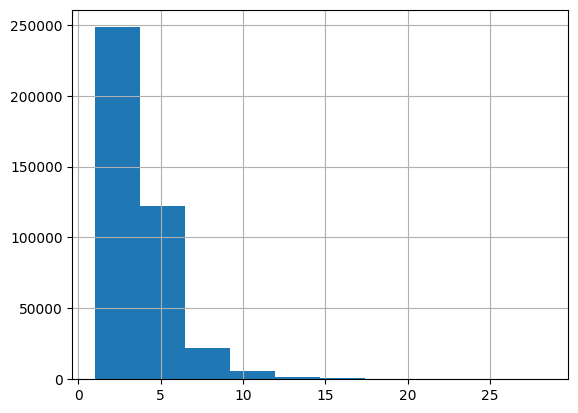

In [17]:
print(trdf['clin_size_long_diam_mm'].max())
trdf['clin_size_long_diam_mm'].hist()

# Image

In [11]:
trhp = h5py.File(trhdf5, 'r')
tshp = h5py.File(tshdf5, 'r')

In [12]:
for trkey in list(trhp.keys())[:10]:
    print(trkey, trhp[trkey])

ISIC_0015670 <HDF5 dataset "ISIC_0015670": shape (), type "|S3325">
ISIC_0015845 <HDF5 dataset "ISIC_0015845": shape (), type "|S2996">
ISIC_0015864 <HDF5 dataset "ISIC_0015864": shape (), type "|S3566">
ISIC_0015902 <HDF5 dataset "ISIC_0015902": shape (), type "|S1998">
ISIC_0024200 <HDF5 dataset "ISIC_0024200": shape (), type "|S2969">
ISIC_0035502 <HDF5 dataset "ISIC_0035502": shape (), type "|S2360">
ISIC_0051648 <HDF5 dataset "ISIC_0051648": shape (), type "|S2205">
ISIC_0051665 <HDF5 dataset "ISIC_0051665": shape (), type "|S3241">
ISIC_0051710 <HDF5 dataset "ISIC_0051710": shape (), type "|S2124">
ISIC_0051758 <HDF5 dataset "ISIC_0051758": shape (), type "|S2059">


(139, 139, 3)


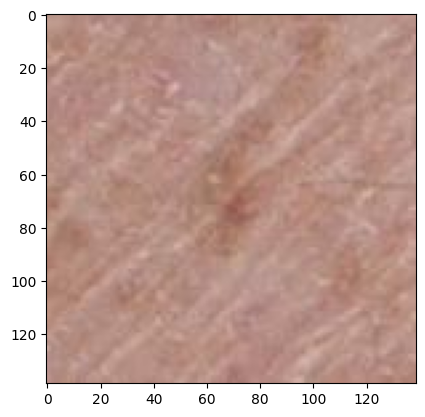

In [22]:
img = np.array(Image.open(BytesIO(trhp['ISIC_0015670'][()])))
print(img.shape)
plt.imshow(img)

In [15]:
# sizes_H = []
# sizes_W = []
# for trkey in list(trhp.keys()):
#     img = np.array(Image.open(BytesIO(trhp[trkey][()])))
#     sizes_H.append(img.shape[0])
#     sizes_W.append(img.shape[1])
# print(np.unique(np.array(sizes_H)))
# print(np.unique(np.array(sizes_W)))

"""
[ 41  45  47  49  51  53  55  57  59  61  63  65  67  69  71  73  75  77
  79  81  83  85  87  89  91  93  95  97  99 101 103 105 107 109 111 113
 115 117 119 121 123 125 127 129 131 133 135 137 139 141 143 145 147 149
 151 153 155 157 159 161 163 165 167 169 171 173 175 177 179 181 183 185
 187 189 191 193 195 197 199 201 203 205 207 209 211 213 215 217 219 221
 223 225 227 229 231 233 235 237 239 241 243 245 247 249 251 253 255 257
 259 261 269]
[ 41  45  47  49  51  53  55  57  59  61  63  65  67  69  71  73  75  77
  79  81  83  85  87  89  91  93  95  97  99 101 103 105 107 109 111 113
 115 117 119 121 123 125 127 129 131 133 135 137 139 141 143 145 147 149
 151 153 155 157 159 161 163 165 167 169 171 173 175 177 179 181 183 185
 187 189 191 193 195 197 199 201 203 205 207 209 211 213 215 217 219 221
 223 225 227 229 231 233 235 237 239 241 243 245 247 249 251 253 255 257
 259 261 269]
"""

[ 41  45  47  49  51  53  55  57  59  61  63  65  67  69  71  73  75  77
  79  81  83  85  87  89  91  93  95  97  99 101 103 105 107 109 111 113
 115 117 119 121 123 125 127 129 131 133 135 137 139 141 143 145 147 149
 151 153 155 157 159 161 163 165 167 169 171 173 175 177 179 181 183 185
 187 189 191 193 195 197 199 201 203 205 207 209 211 213 215 217 219 221
 223 225 227 229 231 233 235 237 239 241 243 245 247 249 251 253 255 257
 259 261 269]
[ 41  45  47  49  51  53  55  57  59  61  63  65  67  69  71  73  75  77
  79  81  83  85  87  89  91  93  95  97  99 101 103 105 107 109 111 113
 115 117 119 121 123 125 127 129 131 133 135 137 139 141 143 145 147 149
 151 153 155 157 159 161 163 165 167 169 171 173 175 177 179 181 183 185
 187 189 191 193 195 197 199 201 203 205 207 209 211 213 215 217 219 221
 223 225 227 229 231 233 235 237 239 241 243 245 247 249 251 253 255 257
 259 261 269]


In [31]:
sizes = []
for trkey in list(trhp.keys()):
    img = np.array(Image.open(BytesIO(trhp[trkey][()])))
    sizes.append(img.shape[:-1])
print(np.unique(np.array(sizes)))

[ 41  45  47  49  51  53  55  57  59  61  63  65  67  69  71  73  75  77
  79  81  83  85  87  89  91  93  95  97  99 101 103 105 107 109 111 113
 115 117 119 121 123 125 127 129 131 133 135 137 139 141 143 145 147 149
 151 153 155 157 159 161 163 165 167 169 171 173 175 177 179 181 183 185
 187 189 191 193 195 197 199 201 203 205 207 209 211 213 215 217 219 221
 223 225 227 229 231 233 235 237 239 241 243 245 247 249 251 253 255 257
 259 261 269]


In [34]:
sizes_np = np.array(sizes)
print(sizes_np.shape)
size_check = (sizes_np[:, 0] == sizes_np[:, 1]).sum()
print(size_check)

(401059, 2)
401059


# Cropping

In [18]:
trdf[trdf['isic_id'] == 'ISIC_0015670']['clin_size_long_diam_mm']

0    3.04
Name: clin_size_long_diam_mm, dtype: float64

In [19]:
pixel = round(3.04 * 3.7795275591)
pixel

11

139 139 3


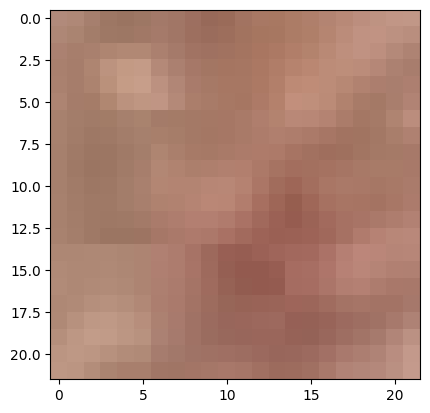

In [30]:
H, W, C = img.shape
print(H, W, C)
crop_range = 11
crop_img = img[H//2 - crop_range:H//2+crop_range, W//2 - crop_range:W//2+crop_range, :]
plt.imshow(crop_img)